## Importing the necessary library

In [1]:
import numpy as np
import pandas as pd


## Importing the data for train and test set

In [2]:
train_df = pd.read_csv('/Users/neeraanand/mnist_train_small.csv')
test_df  = pd.read_csv('/Users/neeraanand/mnist_test.csv')

In [3]:
train_df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Extracting the features from the train and test set

In [5]:
x_train = train_df.drop(['6'], axis=1).values

In [6]:
print(x_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
print(x_train.shape)

(19999, 784)


In [8]:
x_test = test_df.drop(columns = '7', index=1942).values

In [9]:
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Extracting the labels

In [10]:
y_train = train_df['6'].values

In [11]:
print(y_train)

[5 7 9 ... 2 9 5]


In [12]:
y_test = test_df['7'].drop(1942).values

In [13]:
print(y_test)

[2 1 0 ... 5 7 8]


In [14]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
print(len(np.unique(y_train)))

10


In [16]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Normalisisng the train and test features

In [17]:
x_train = x_train/255
x_test = x_test/255

## One hot encoding

In [18]:
y_train_new = np.zeros([x_train.shape[0], len(np.unique(y_train))])

In [19]:
print(y_train_new.shape)

(19999, 10)


In [20]:
for i in range(len(np.unique(y_train))):
    for j in range(len(y_train_new)):
        if y_train[j]==np.unique(y_train)[i]:
            y_train_new[j, i]=1
        else:
            y_train_new[j, i] =0
print(y_train_new)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [21]:
y_test_new = np.zeros([x_test.shape[0], len(np.unique(y_test))])


In [22]:
for i in range(len(np.unique(y_test))):
    
    for j in range(len(y_test_new)):
        
        if y_test[j]==np.unique(y_test)[i]:
            
            y_test_new[j, i]=1
            
        else:
            
            y_test_new[j, i] = 0
            
print(y_test_new)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


## Defining the neural networks

In [23]:
 def initialise_params():
    # Parameters intialisation
    theta_1 = np.random.rand(y_train_new.shape[1], x_train.shape[1]) - 0.5
    # theta_1 is of shape 10*784 [Between input and first hidden layer]
    b1 = np.random.rand(y_train_new.shape[1], 1) - 0.5
    # Bias_1 is of shape 10*1
    theta_2 = np.random.rand(y_train_new.shape[1], y_train_new.shape[1]) - 0.5
    # theta_2 is of shape 10*10 [Between fist hidden and second hidden layer]
    b2 = np.random.rand(y_train_new.shape[1], 1) - 0.5
    # Bias_2 is of shape 10*1
    theta_3 = np.random.rand(y_train_new.shape[1], y_train_new.shape[1]) - 0.5
    # theta_3 is of shape 10*10 [ Between second hidden layer and output layer]
    b3 = np.random.rand(y_train_new.shape[1], 1) - 0.5
    # bias_3 is of shape 10*1
    
    return theta_1, b1, theta_2, b2, theta_3, b3


In [24]:
def ReLU(Z):
    # relu is an activation function
    return np.maximum(Z, 0)

In [25]:
def softmax(Z):
    # softmax is also an activation function
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [26]:
def sigmoid(z):
    # sigmoid is also an activation function
    return (1/(1+np.exp(-z)))

In [27]:
def forward_prop(theta_1, b1, theta_2, b2,theta_3, b3, X):
    Z1 = theta_1.dot(X.T) + b1
    A1 = ReLU(Z1)
    # ReLU is used in first hidden layer
    Z2 = theta_2.dot(A1) + b2
    A2 = sigmoid(Z2)
    # sigmoid is used in second layer
    Z3 = theta_3.dot(A2) + b3
    A3 = softmax(Z3)
    # softmax is used at output layer
    return Z1, A1, Z2, A2, Z3, A3

In [28]:
def ReLU_gradient(Z):
    return Z > 0

In [29]:
def sigmoid_gradient(z):
    s = sigmoid(z)
    return s*(1-s)

In [30]:
# Backward propogation
def backward_prop(Z1, A1, Z2, A2, Z3, A3, theta_1, theta_2, theta_3, X, Y):
    m = x_train.shape[0]
    dZ3 = A3 - Y.T
    dtheta_3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    dZ2 = theta_3.T.dot(dZ3)*sigmoid_gradient(Z2)
    dtheta_2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = theta_2.T.dot(dZ2) * ReLU_gradient(Z1)
    dtheta_1 = 1 / m * dZ1.dot(X)
    db1 = 1 / m * np.sum(dZ1)
    return dtheta_1, db1, dtheta_2, db2, dtheta_3, db3

In [31]:
def computeCost(x, y):
    # cost function
    alpha = np.multiply(np.log(x), y.T) + np.multiply( np.log(1 - x),(1 - y.T))
    return - np.sum(alpha) / len(x_train)

In [32]:
# Function to update parameters
def update_params(theta_1, b1, theta_2, b2, theta_3, b3, dtheta_1, db1, dtheta_2, db2, dtheta_3, db3, learning_rate):
    theta_1 = theta_1 - learning_rate * dtheta_1
    b1 = b1 - learning_rate * db1    
    theta_2 = theta_2 - learning_rate* dtheta_2  
    b2 = b2 - learning_rate * db2
    theta_3 = theta_3 - learning_rate*dtheta_3
    b3 = b3 - learning_rate*db3
    return theta_1, b1, theta_2, b2, theta_3, b3

In [33]:
def gradient_descent(X, Y, learning_rate, iterations):
    cost_hist = np.zeros(iterations)
    theta_1, b1, theta_2, b2, theta_3, b3 = initialise_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(theta_1, b1, theta_2, b2, theta_3, b3, X)
        dtheta_1, db1, dtheta_2, db2, dtheta_3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, theta_1, theta_2, theta_3, X, Y)
        theta_1, b1, theta_2, b2, theta_3, b3 = update_params(theta_1, b1, theta_2, b2,theta_3, b3, dtheta_1, db1, dtheta_2, db2, dtheta_3, db3, learning_rate)
        cost_hist[i] = computeCost(A3, Y)
    return theta_1, b1, theta_2, b2, theta_3, b3, cost_hist


In [50]:
learning_rate = 0.55
iterations = 8500
theta_1, b1, theta_2, b2,theta_3, b3, cost_hist = gradient_descent(x_train, y_train_new, learning_rate, iterations)

In [51]:

 Z1, A1, Z2, A2, Z3, A3 = forward_prop(theta_1, b1, theta_2, b2,theta_3, b3, x_train)
predictions = np.argmax(A3, 0)
print(predictions)

[5 7 9 ... 2 9 5]


## Displaying the predicted values for train set

In [52]:
df = pd.DataFrame(columns = ['Predicted_target', 'Original_target'])
df['Predicted_target'] = predictions
df['Original_target'] = y_train
df.head()

,Predicted_target,Original_target
0,5,5
1,7,7
2,9,9
3,5,5
4,2,2


In [53]:
Z1, A1, Z2, A2, Z3, A3 = forward_prop(theta_1, b1, theta_2, b2, theta_3, b3, x_test)
predictions1 = np.argmax(A3, 0)
print(predictions1)

[2 1 0 ... 5 4 6]


## Displaying the predicted values for test set

In [54]:
df = pd.DataFrame(columns = ['Predicted_target', 'Original_target'])
df['Predicted_target'] = predictions1
df['Original_target'] = y_test
df.head()

,Predicted_target,Original_target
0,2,2
1,1,1
2,0,0
3,4,4
4,1,1


## Accuracy for the train set

In [55]:
from sklearn.metrics import accuracy_score
print("Accuracy for the train set:", accuracy_score(predictions, y_train)*100)

Accuracy for the train set: 97.07985399269964


## Accuracy for the test set

In [56]:
from sklearn.metrics import accuracy_score
print("Accuracy for test set is:", accuracy_score(predictions1, y_test)*100)

Accuracy for test set is: 90.57672502574665


## Plotting the graph to show convergence

Text(0.5, 1.0, 'Convergence of gradient')

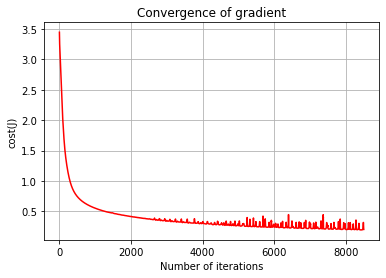

In [57]:
import matplotlib.pyplot as plt
plt.plot(range(1, iterations+1), cost_hist, color='red')
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost(J)")
plt.title("Convergence of gradient")